In [70]:
using Plots
using DelimitedFiles
using LaTeXStrings

include("TN_Superfermionic_Mesoscopic_Leads/Code/Interacting_functions.jl")

This package is totally compatible with gpu. If you want to use GPU, just define GPU = true as a global variable in your code.


Energy_Current_HS_time_dependent

In [128]:
precompile_package("TN_Superfermionic_Mesoscopic_Leads", true)

Effective GPU memory usage: 14.92% (1.193 GiB/7.996 GiB)
Memory pool usage: 3.134 MiB (32.000 MiB reserved)
The package has been precompiled for GPU = true.
 16.053917 seconds (26.93 M allocations: 4.172 GiB, 4.86% gc time)


In [133]:
L = 10
D = 4
R_dict = Dict()
JF_dict = Dict()
JR_dict = Dict()
time_dict = Dict()

E_values = 0.2:0.2:4.8

# Folder = "/jet/home/penuelap/Heat_rectification_Data/" #PSC
Folder = "Local_Data/U=2.5 ΔT (Thot= 1000 and Tcold=1)/" #MSI

for Current = ["JE", "JP"]
    R_values = []
    JF_dict[Current] = Dict()
    JR_dict[Current] = Dict()
    
    for E = E_values

        E = Float64(E)
        D = Int64(D)

        Name = "_E=$E"*"_L=$L"*"_D=$D"

        J_F = readdlm(Folder*"Forward"*Name*"_NESS_$Current.txt")
        J_R = readdlm(Folder*"Reverse"*Name*"_NESS_$Current.txt")
        time = readdlm(Folder*"Reverse"*Name*"_NESS_time.txt")

        #Save rectification coefficient into a dict to save it.
        abs(J_F[end]) > abs(J_R[end]) ? R = abs(J_F[end]/J_R[end]) : R = abs(J_R[end]/J_F[end])
        append!(R_values, R)      
        
        # Generate plots

        plot(time, J_R, color = "blue", label = "Reverse")
        plot!(time, J_F, color = "red", label = "Forward")
        hline!([0], linestyle = :dash, color = "gray", label = false, alpha = 0.5)
        title!("E=$E"*", L=$L"*", D=$D")
        Current == "JE" ? ylabel!("Energy Current "*L"J_{E}") : ylabel!("Particle Current "*L"J_{P}")
        R = round(R; digits = 5)
        annotate!(time[end]/2, 0.0 , L"R = "*"$R")   
        # savefig(Folder*"Results"*Name*"_$Current.pdf")      

        JF_dict[Current][E] = J_F
        JR_dict[Current][E] = J_R
        Current == "JE" ? time_dict[E] = time : nothing
    end
    R_dict[Current] = R_values

end

J_F = ((JF_dict[Current])[E])[end] = 0.012163925532323214
J_R = ((JR_dict[Current])[E])[end] = -0.01146662361521375


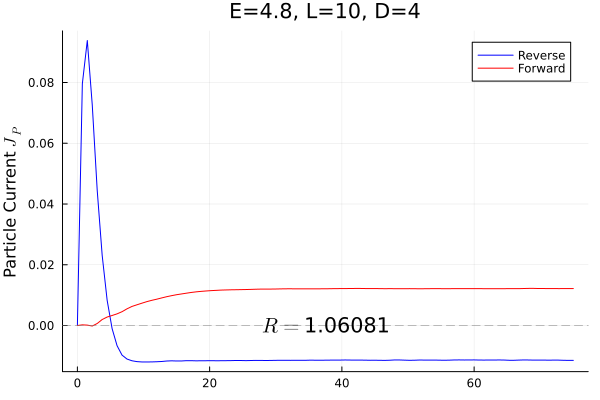

In [134]:
#For plotting an specific plot with zoom

E = 4.8
Current = "JP"

plot(time_dict[E], JR_dict[Current][E], color = "blue", label = "Reverse")
plot!(time_dict[E], JF_dict[Current][E], color = "red", label = "Forward")
hline!([0], linestyle = :dash, color = "gray", label = false, alpha = 0.5)
@show J_F = JF_dict[Current][E][end] 
@show J_R = JR_dict[Current][E][end]

abs(J_F) > abs(J_R) ? R = abs(J_F/J_R) : R = abs(J_R/J_F)
R = round(R; digits = 5)
annotate!(time_dict[E][end]/2, 0.0 , L"R = "*"$R")
title!("E=$E"*", L=$L"*", D=$D")
Current == "JE" ? ylabel!("Energy Current "*L"J_{E}") : ylabel!("Particle Current "*L"J_{P}")

#zoom?
# xlims!(40, 50)
# ylims!(-0.2, 0.2)

In [135]:
#Rectification coefficient.

scatter(E_values, R_dict["JE"], xlabel = "E", ylabel = L"R = |max(J_{F}, J_{R})/min(J_{F}, J_{R})|", label = "Energy Current", color = "blue")
plot!(E_values, R_dict["JE"], label = false, color = "blue")

scatter!(E_values, R_dict["JP"], label = "Particle Current", color = "red")
plot!(E_values, R_dict["JP"], label = false, color = "red")

title!("D = $D, L = 10, U = 2.5")
savefig(Folder*"R Coefficient vs E.pdf")

"C:\\Users\\JOP204\\Documents\\GitHub\\Heat_Rectification_in_Tilted_Systems\\Local_Data\\U=2.5 ΔT (Thot= 1000 and Tcold=1)\\R Coefficient vs E.pdf"

In [136]:
GPU = true

Occupations_F = Dict()
Occupations_R = Dict()

for E = E_values

    Name = "_E=$E"*"_L=$L"*"_D=$D"    

    begin @time for direction = ["Forward", "Reverse"]

        f = h5open(Folder*direction*Name*"_NESS_MPS.h5")
        NESS = read(f,"MPS", MPS)
        close(f)

        GPU == true ? NESS = gpu(NESS) : nothing
        
        sites = siteinds(NESS)
        I_vec = Build_left_vacuum(sites)
        direction == "Forward" ? Occupations_F[E] = Occupations_per_site(NESS, I_vec) : Occupations_R[E] = Occupations_per_site(NESS, I_vec)
    end
    end
    println("E = $E occupation calculation has finished")
end

  6.648750 seconds (3.04 M allocations: 430.746 MiB, 0.66% gc time, 0.40% compilation time)
E = 0.2 occupation calculation has finished
  6.209657 seconds (3.03 M allocations: 429.891 MiB, 0.52% gc time)
E = 0.4 occupation calculation has finished
  6.295986 seconds (3.03 M allocations: 429.913 MiB, 0.69% gc time)
E = 0.6 occupation calculation has finished
  6.264279 seconds (3.03 M allocations: 429.944 MiB, 0.50% gc time)
E = 0.8 occupation calculation has finished
  6.243629 seconds (3.03 M allocations: 429.973 MiB, 0.55% gc time)
E = 1.0 occupation calculation has finished
  6.312300 seconds (3.03 M allocations: 430.008 MiB, 0.63% gc time)
E = 1.2 occupation calculation has finished
  6.431453 seconds (3.03 M allocations: 430.016 MiB, 0.57% gc time)
E = 1.4 occupation calculation has finished
  6.218094 seconds (3.03 M allocations: 430.044 MiB, 0.60% gc time)
E = 1.6 occupation calculation has finished
  6.221233 seconds (3.03 M allocations: 430.073 MiB, 0.51% gc time)
E = 1.8 occu

In [137]:
Occupations_F[1.2]

24-element Vector{Any}:
 0.5019234294086481
 0.5013750822354535
 0.5022385482816245
 0.5027338645495463
 0.5000982935795226
 0.4950652728476963
 0.492080344642098
 0.49128413158485645
 0.49340406199427406
 0.49715620614305905
 0.46867848628224756
 0.3443743318338315
 0.3178377463872486
 0.3366527293678447
 0.9954662481215637
 0.9776757249856156
 0.9380114377895201
 0.8330323532724943
 0.6232397539923428
 0.36651616697398787
 0.17585751670023259
 0.07712290252448188
 0.03381911526014809
 0.004716784101838783

In [138]:
for direction = ["Forward", "Reverse"]

    direction == "Forward" ? Occupations = Occupations_F : Occupations = Occupations_R
    # plot()
    for E = E_values
    
        scatter(1:1:L, Occupations[E][1:L], label = "L")
        scatter!(L+1:1:L+D, Occupations[E][L+1:L+D], label = "S")
        scatter!(L+D+1:1:L+D+L, Occupations[E][L+D+1:L+D+L], label = "R")
    
        title!("E = $E")
        xlabel!("Physical site i")
        ylabel!(L"\langle N_{i} \rangle")
        
        savefig(Folder*"Occupation $direction $E = $E.pdf")
    end
end